In [1]:
#importing
import pandas as pd
import numpy as np
import re

****
# Feature Definitions and Reading Data #
****

**1. ID :** unique identifier

**2. Age :** customer’s age

**3. Experience :** number of years of profession experience

**4. Income :** annual income of the customer ($000)

**5. ZipCode :** home address zip code

**6. Family :** family size of customer

**7. CCAvg :** average spending on credit cards per month ($000)

**8. Education :** education level (1) undergraduate, (2) graduate, (3) advanced/professional

**9. Mortgage :** value of house mortgage ($000)

**10. Personal Loan(y) :** did the customer accept the personal load offered (1=Yes, 0=No)

**11. Securities Account :** does the customer have a securities account with the bank? (1=Yes, 0=No)

**12. CD Account :** does the customer have a certificate of deposit with the bank? (1=Yes, 0=No)

**13. Online :** does the customer use Internet banking facilities (1=Yes, 0=No)

**14. CreditCard :** does the customer use a credit card issued by Universal Bank? (1=Yes, 0=No)

In [2]:
df=pd.read_csv(r'/kaggle/input/personal-loan/Bank_Loan.csv') #Reading the data
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


****
# Data Visualization #
****

In [3]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

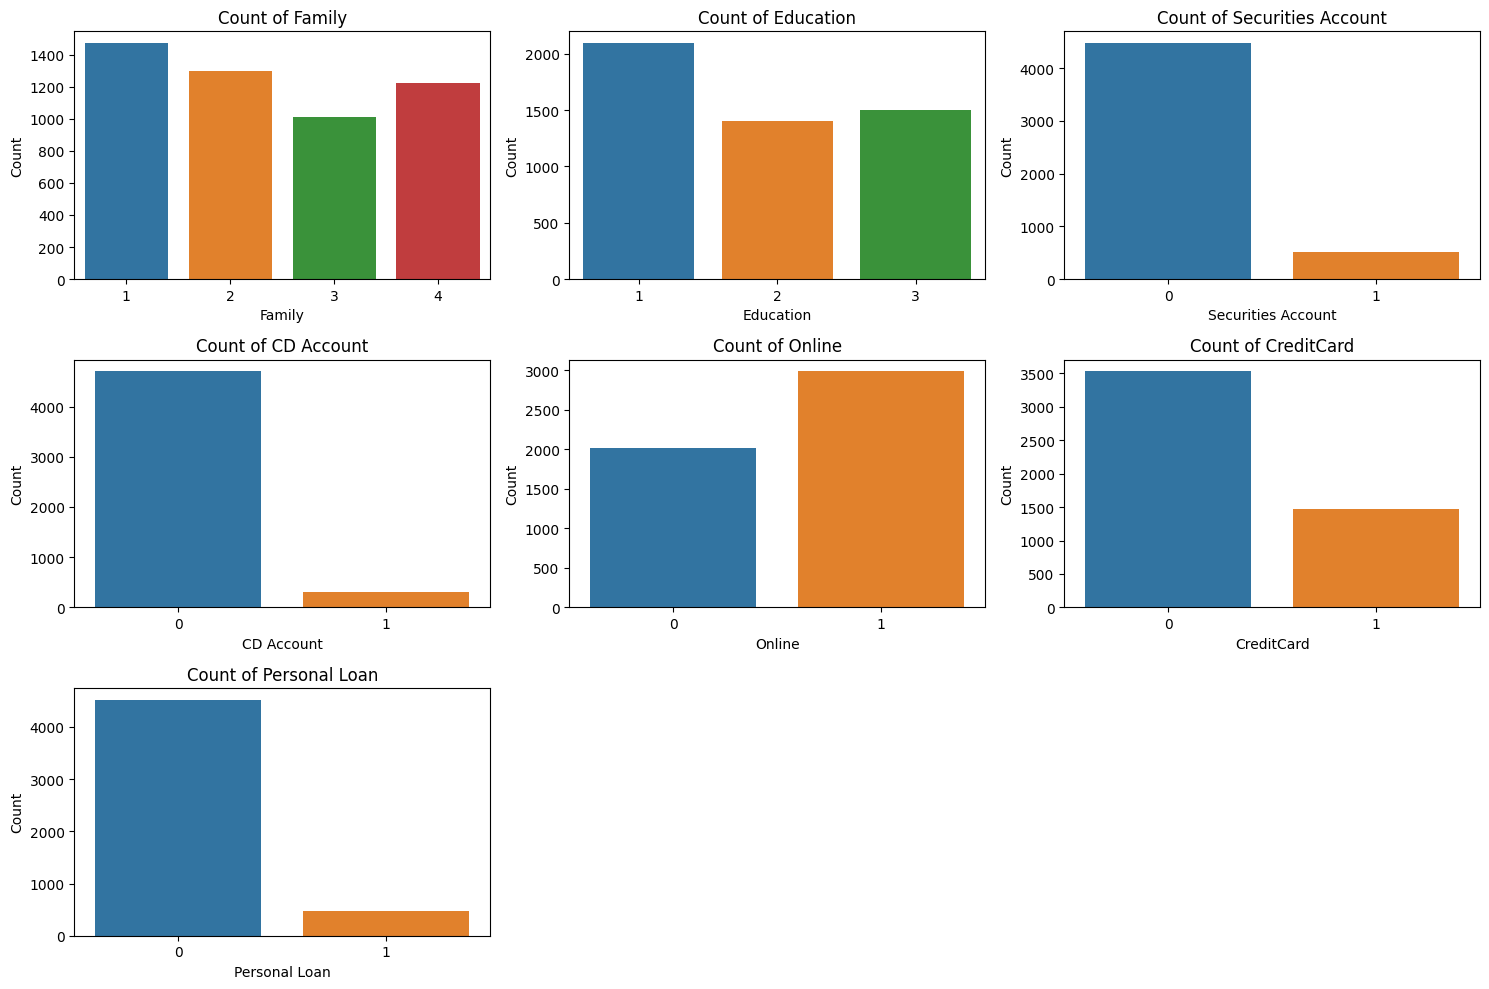

In [6]:
# Let us look at how some of the features are distributed on the dataset
# Let us plot a pie chart to see how they are distributed

cols=['Family', 'Education','Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

axes[-1].axis('off')
axes[-2].axis('off')
plt.tight_layout()
plt.show()

It appears our data is highly Imbalanced **(  Tragic :(   )**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

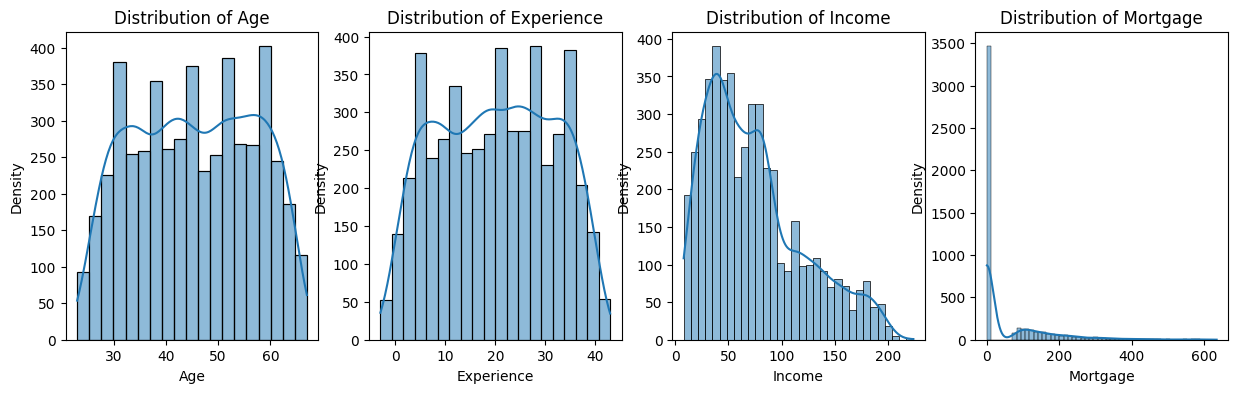

In [7]:
# Let us look at how some of our features which contain continuous values are distributed
# We can view this using Histograms

cols=['Age', 'Experience', 'Income','Mortgage']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(x=col, data=df, ax=axes[i],kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')


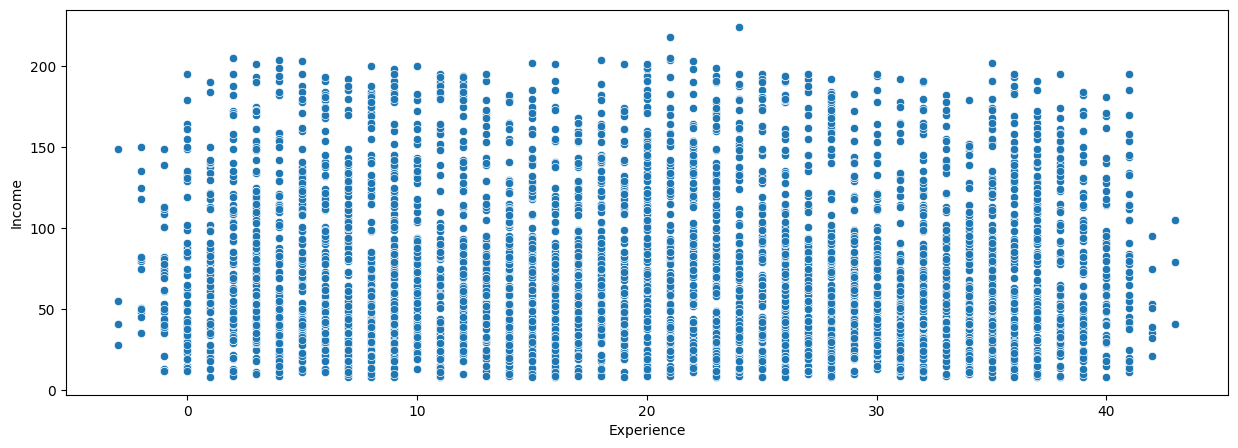

In [8]:
# Let us look at how Experience and Inocme are realted
# Best way to do this is using a scatter plot

plt.figure(figsize=(15,5))
sns.scatterplot(data=df,y='Income',x='Experience')
plt.show()

For the Same experience the income is higher for some than the rest. This means the Income one recieves is not solely based on Experience (Shocking 😯)

There must be something else playing in the background.
Lets plot the same graph but with other features as a differentiator( Hue)

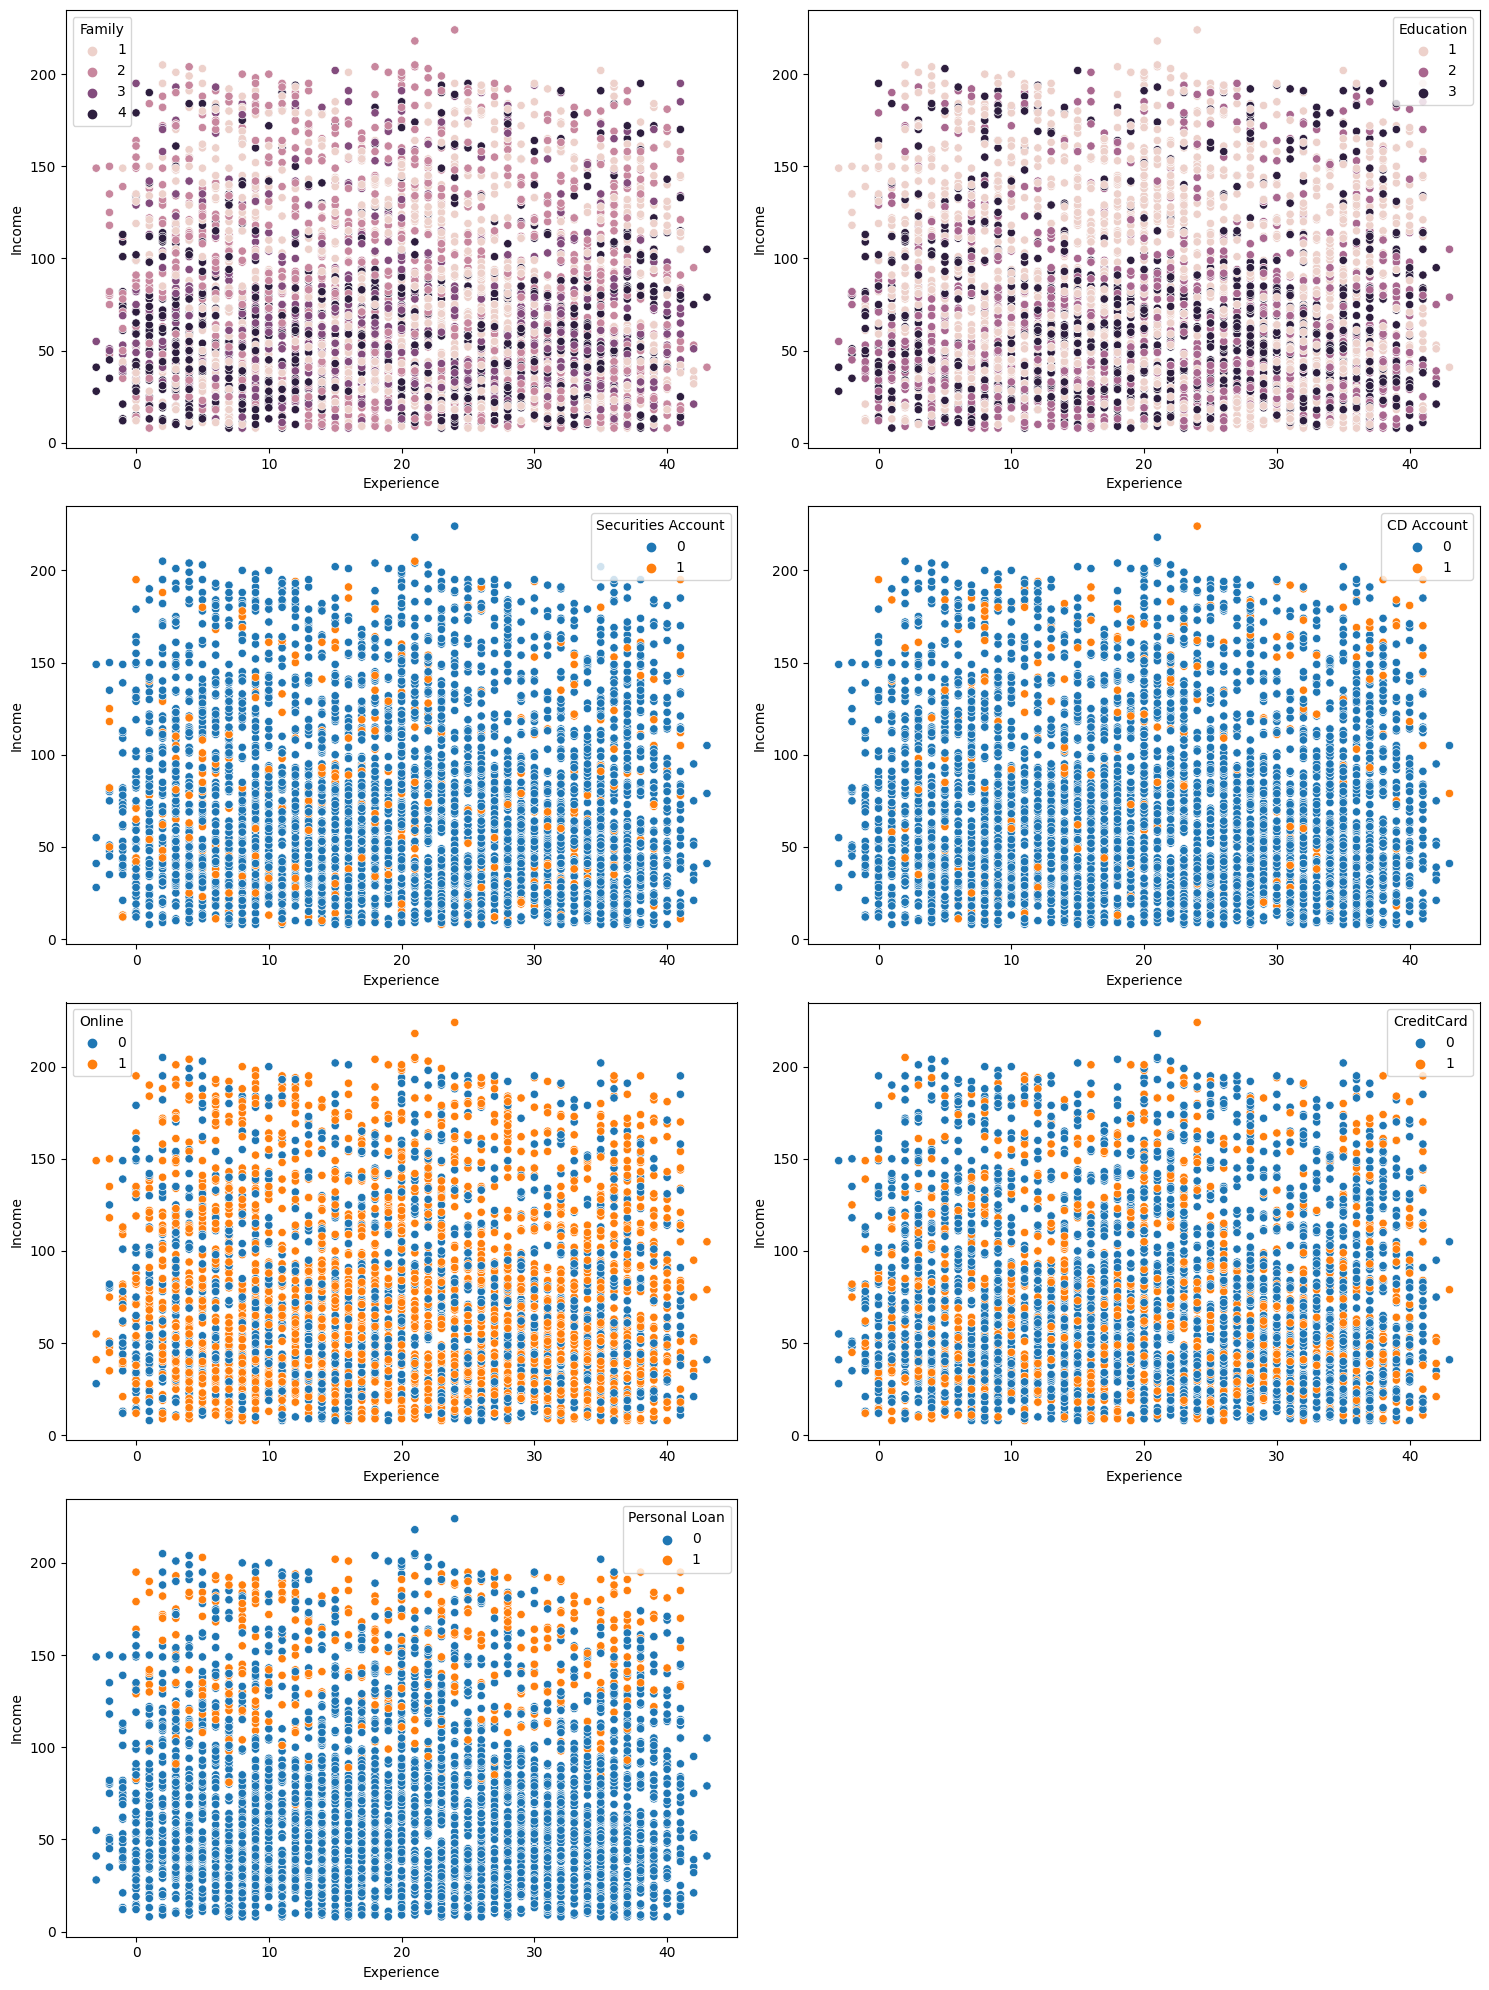

In [9]:
cols=['Family', 'Education','Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(data=df,y='Income',x='Experience',hue=col,ax=axes[i])

axes[-1].axis('off')
plt.tight_layout()
plt.show()

We were Right, there were other features playing in the background. (Yaaay!!)

If we take a look at the first two graphs we realize the following things:
1. Less Family Members mean more income
2. More Income is present for Education category 2 or 3
3. Personal Loans are taken by people with income on the higher side of the plot(>100)
4. For rest of the plots we can't really find anything as they are imbalanced

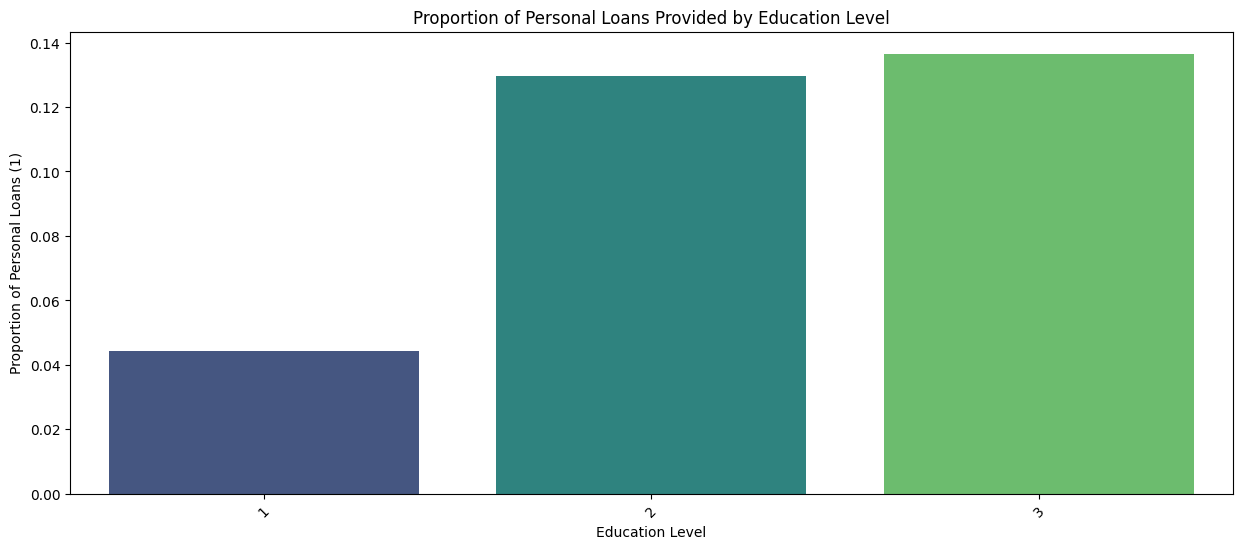

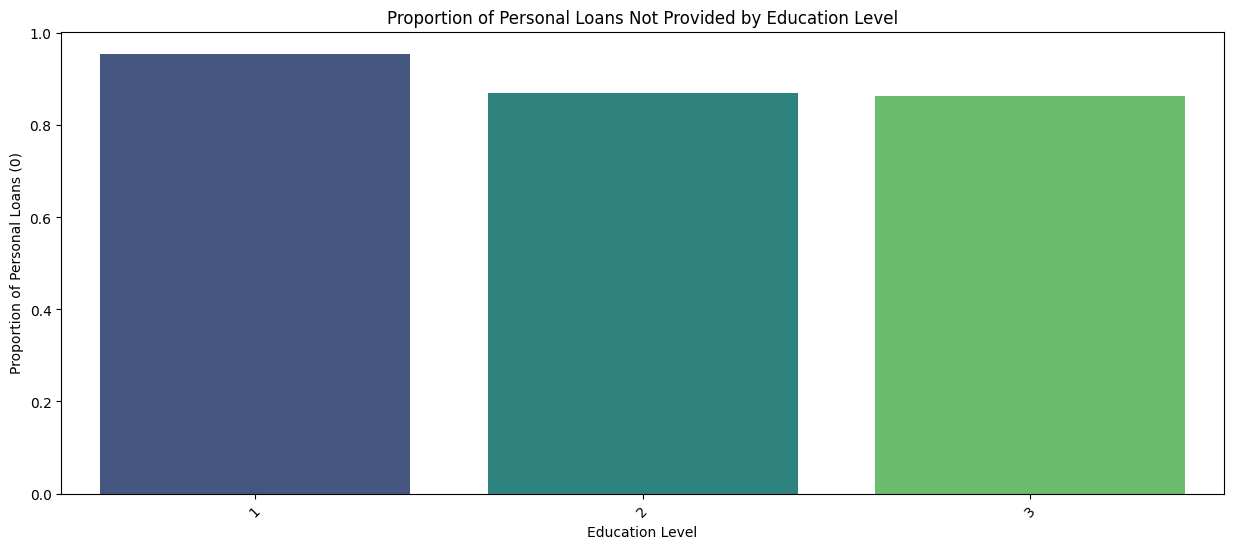

In [10]:
# Let us plot the proportion of Loan accepted and rejected with respect to the Education Level
loan_counts = df.groupby(['Education', 'Personal Loan']).size().unstack().fillna(0)
loan_proportions = loan_counts.div(loan_counts.sum(axis=1), axis=0).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=loan_proportions, x='Education', y=1, palette='viridis')
plt.title('Proportion of Personal Loans Provided by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Personal Loans (1)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(data=loan_proportions, x='Education', y=0, palette='viridis')
plt.title('Proportion of Personal Loans Not Provided by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Personal Loans (0)')
plt.xticks(rotation=45)
plt.show()

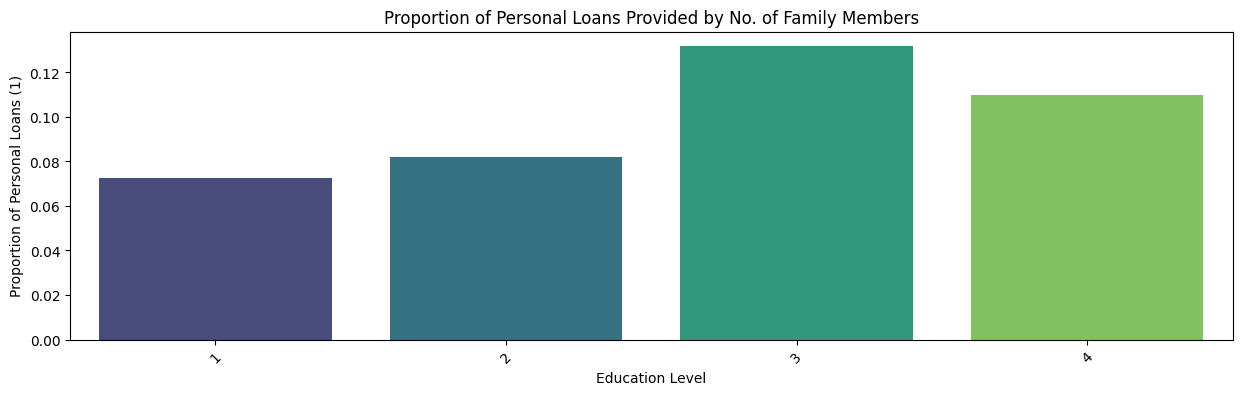

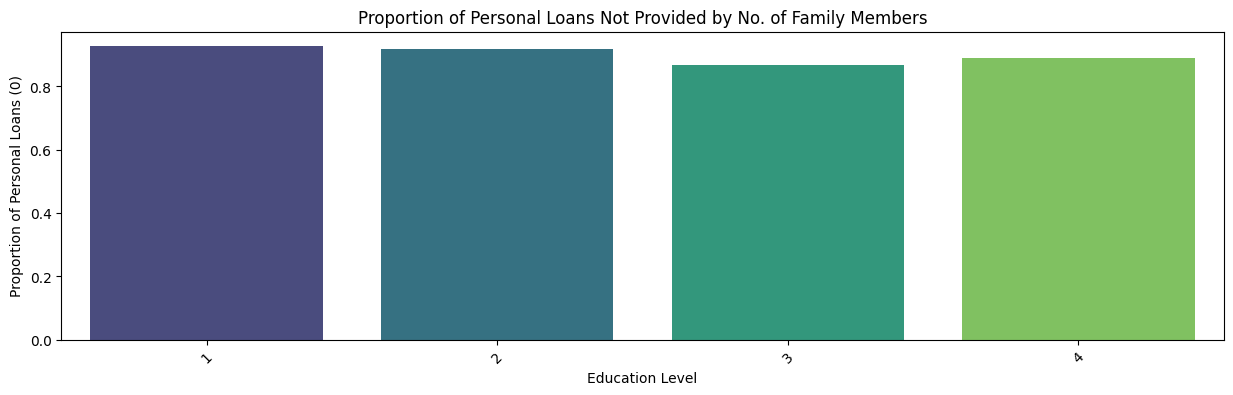

In [11]:
# Let us plot the proportion of Personal Loans accepted and rejected with respect to thr No. of Family Members

loan_counts = df.groupby(['Family', 'Personal Loan']).size().unstack().fillna(0)
loan_proportions = loan_counts.div(loan_counts.sum(axis=1), axis=0).reset_index()

plt.figure(figsize=(15, 4))
sns.barplot(data=loan_proportions, x='Family', y=1, palette='viridis')
plt.title('Proportion of Personal Loans Provided by No. of Family Members')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Personal Loans (1)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 4))
sns.barplot(data=loan_proportions, x='Family', y=0, palette='viridis')
plt.title('Proportion of Personal Loans Not Provided by No. of Family Members')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Personal Loans (0)')
plt.xticks(rotation=45)
plt.show()

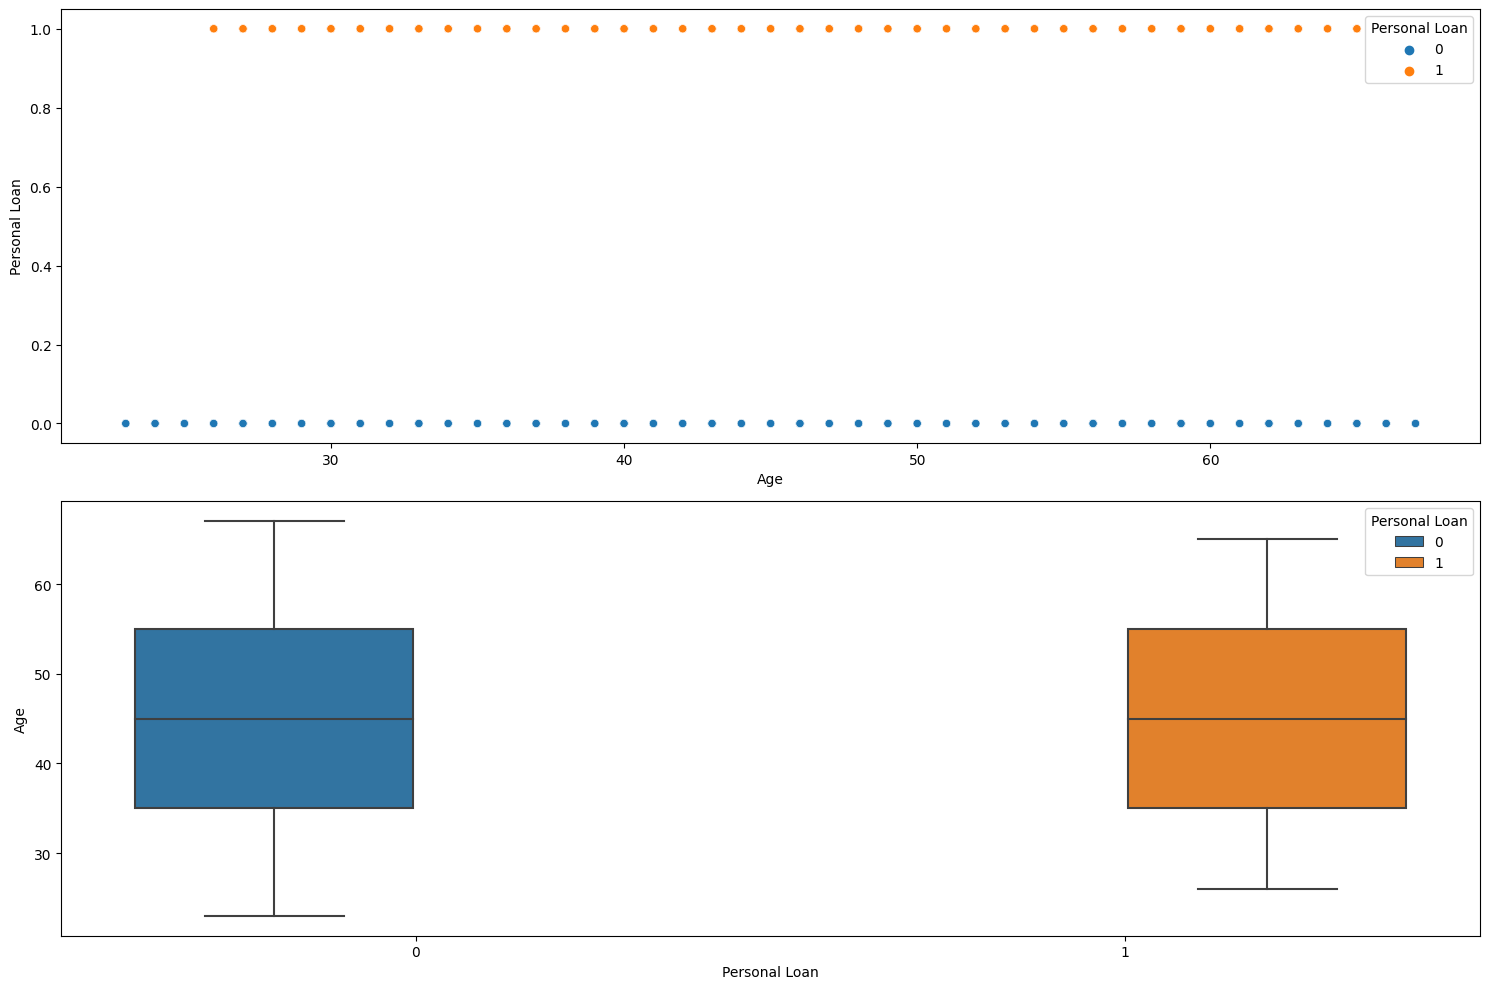

In [12]:
# Let us look at age
# We have already looked at its distribution
# let us plot a scatter plot as well as a boxplot to see how age is related to accepting and rejecting a Personal Loan

fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data=df,x='Age',y='Personal Loan',ax=ax[0],hue='Personal Loan')
sns.boxplot(data=df,y='Age',x='Personal Loan',hue='Personal Loan',ax=ax[1])
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

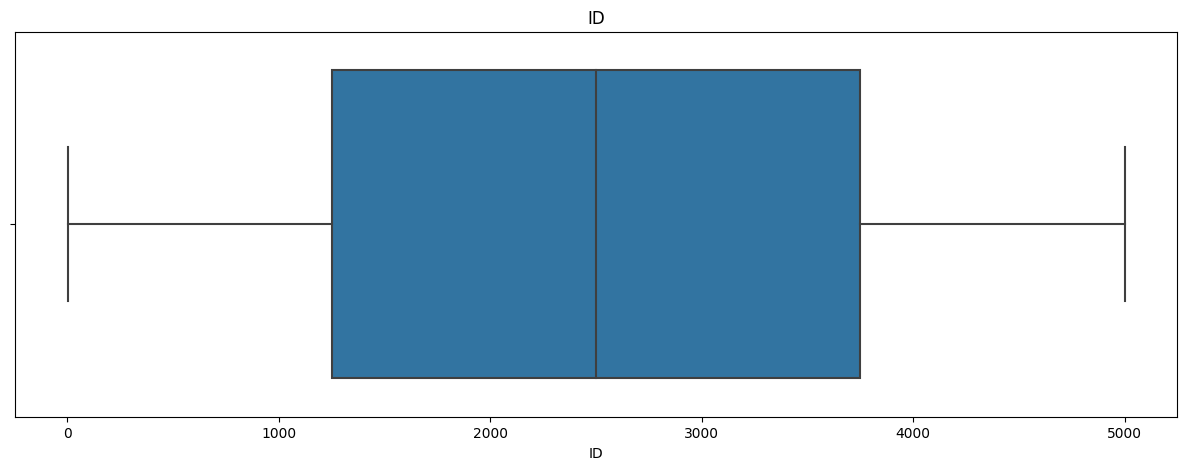

<Figure size 1500x500 with 0 Axes>

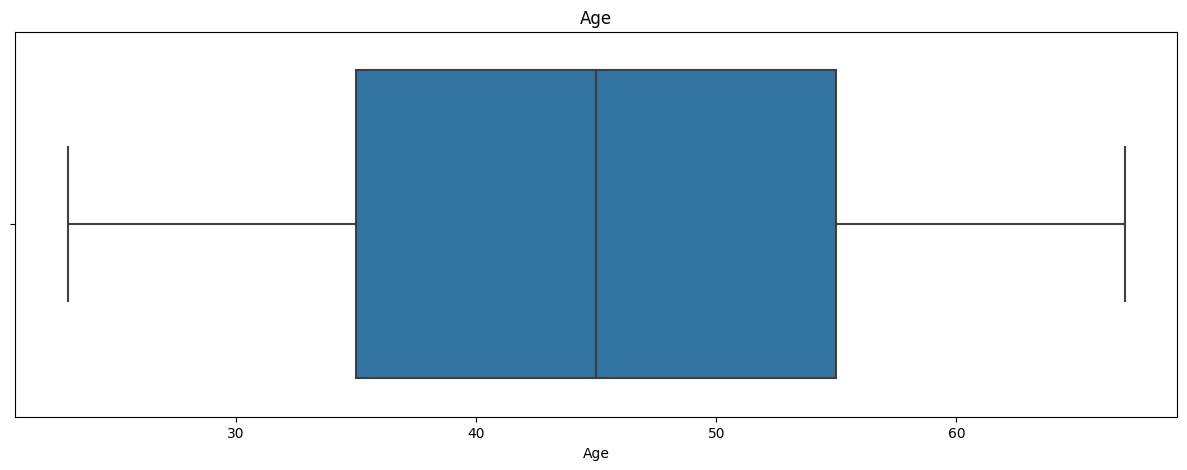

<Figure size 1500x500 with 0 Axes>

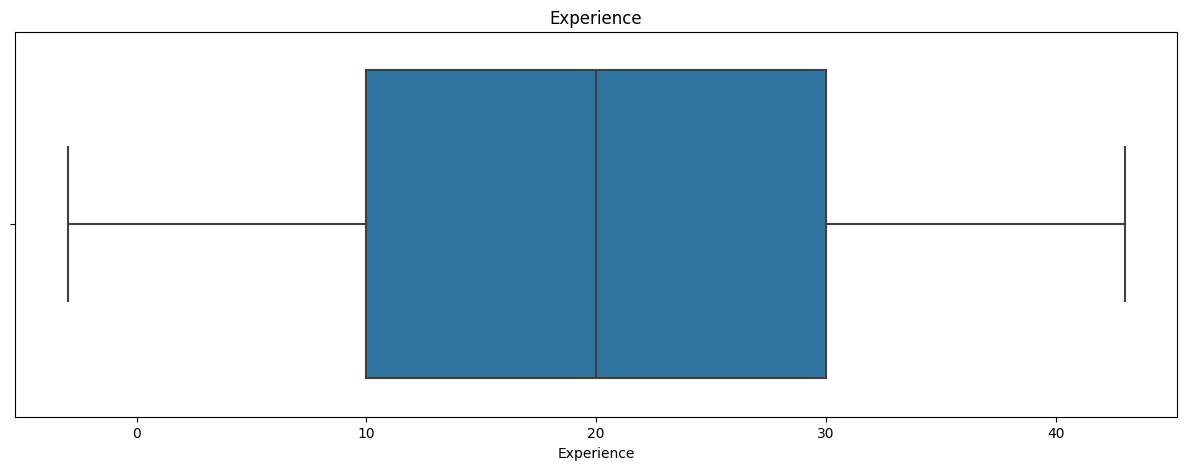

<Figure size 1500x500 with 0 Axes>

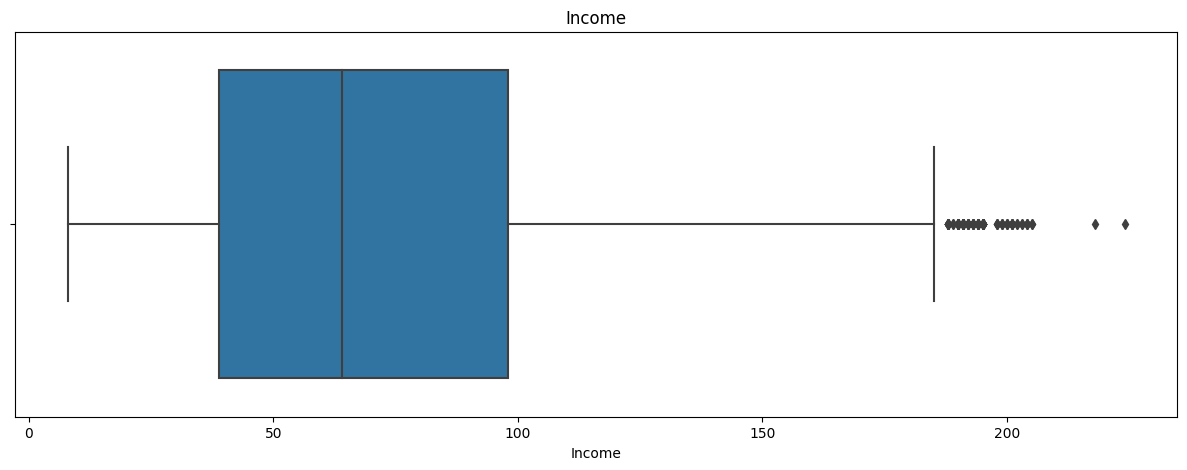

<Figure size 1500x500 with 0 Axes>

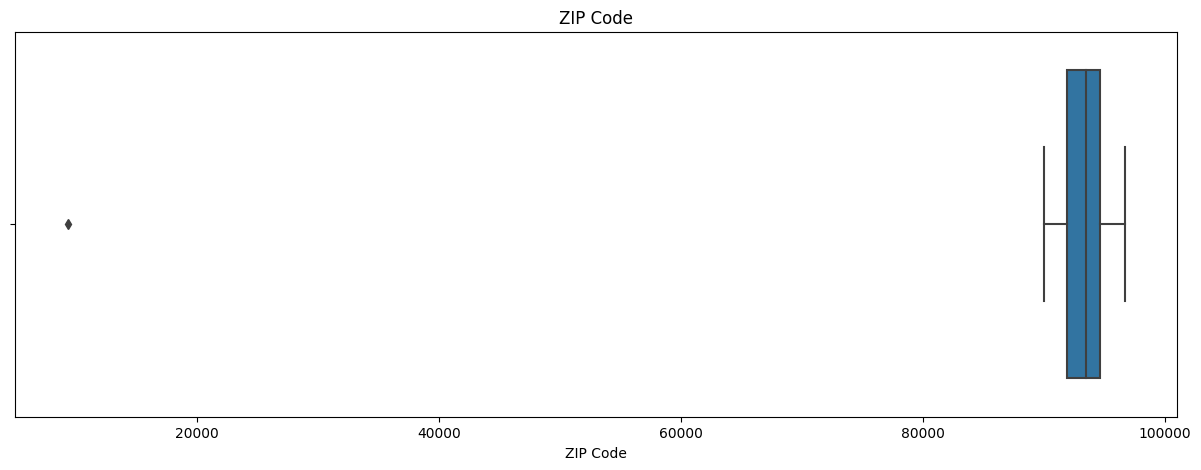

<Figure size 1500x500 with 0 Axes>

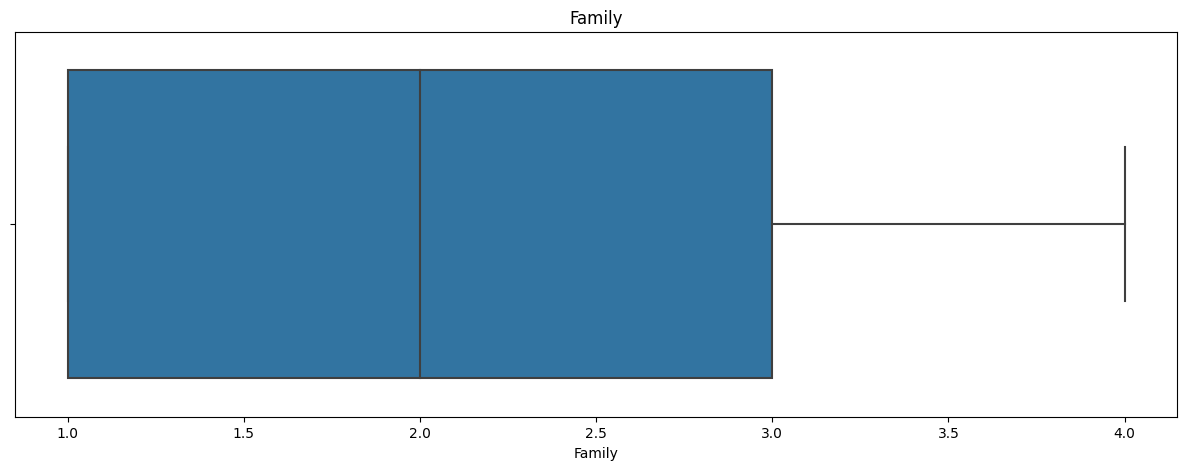

Skipping CCAvg because it is not numeric.


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

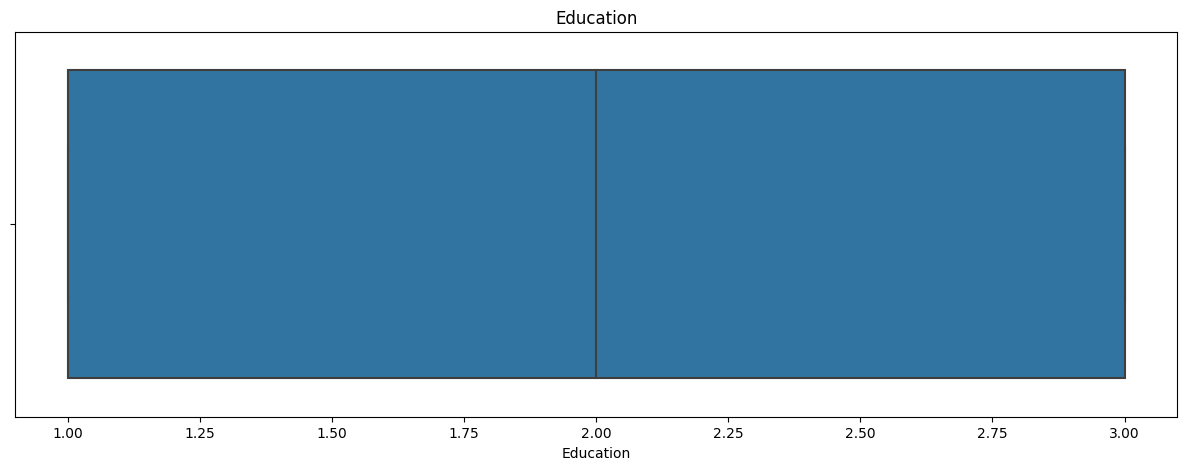

<Figure size 1500x500 with 0 Axes>

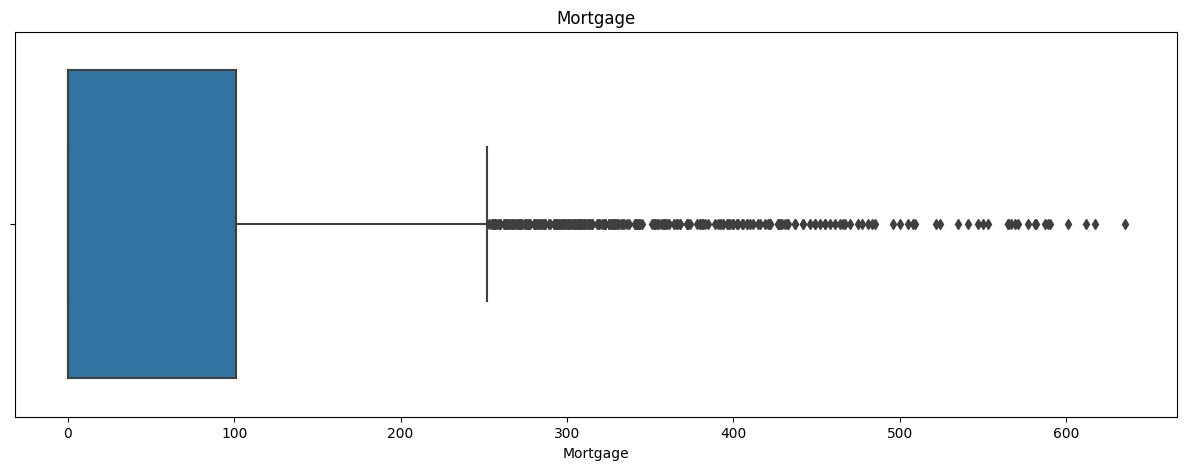

<Figure size 1500x500 with 0 Axes>

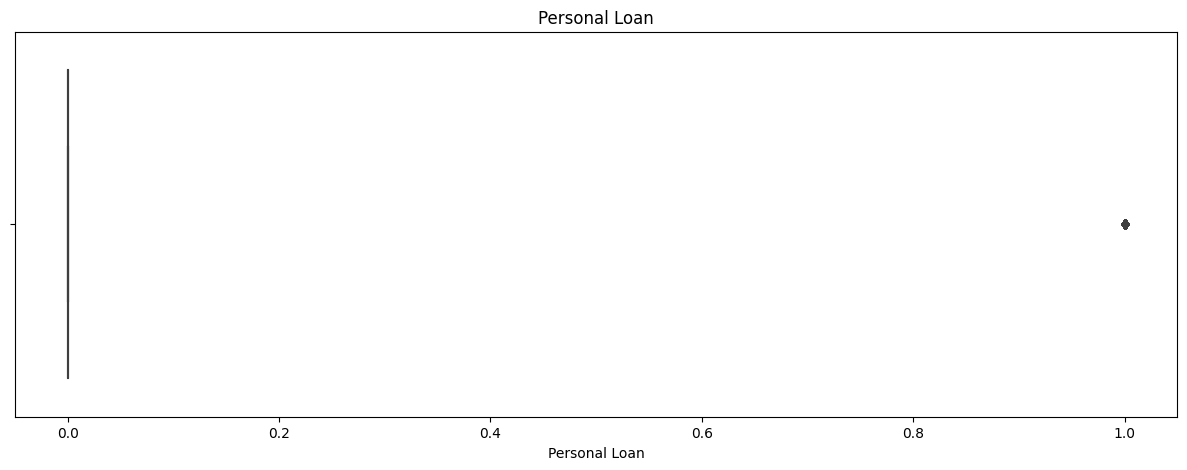

<Figure size 1500x500 with 0 Axes>

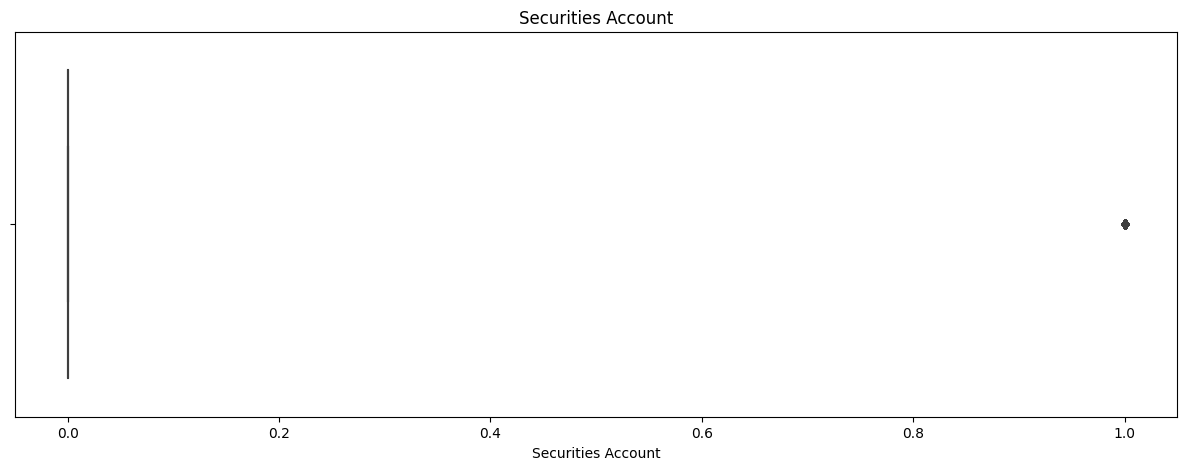

<Figure size 1500x500 with 0 Axes>

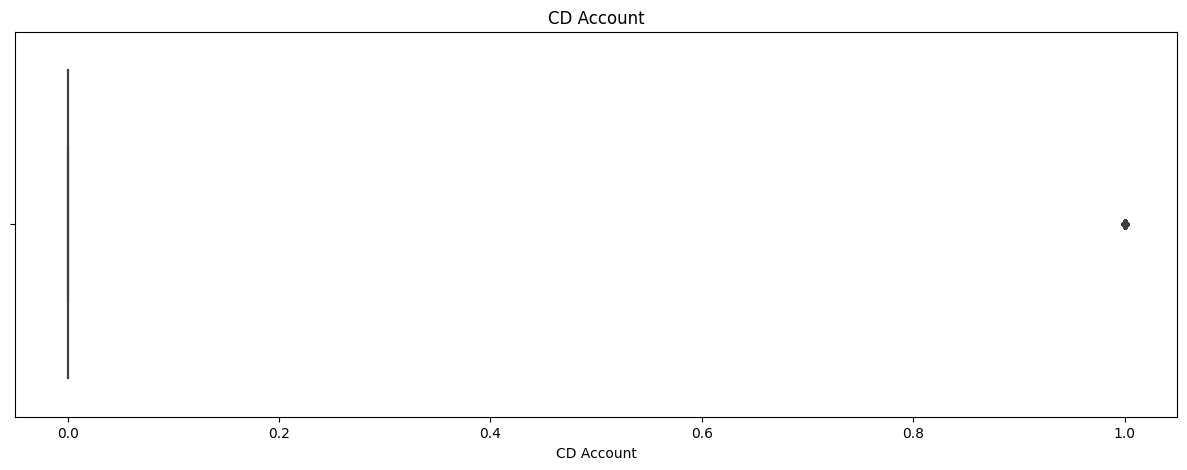

<Figure size 1500x500 with 0 Axes>

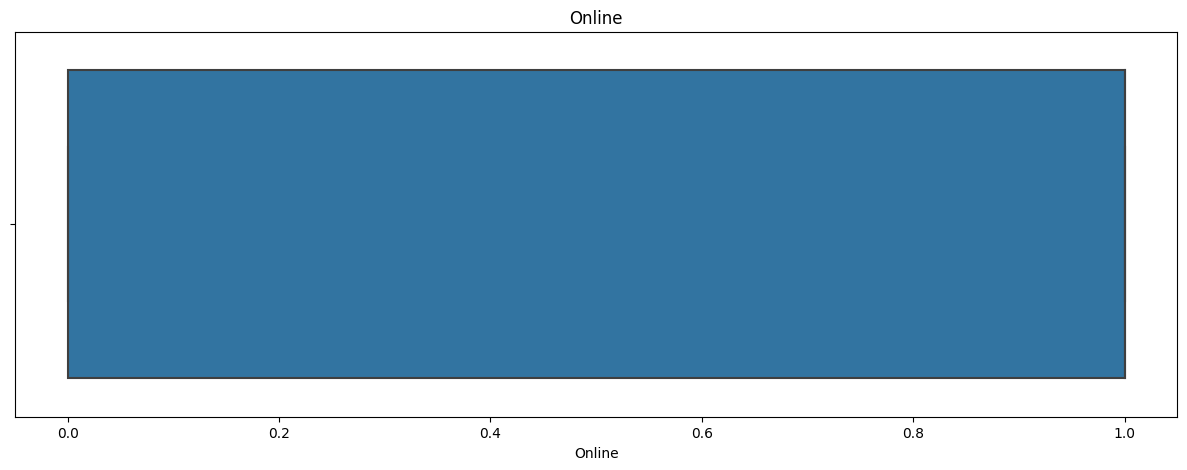

<Figure size 1500x500 with 0 Axes>

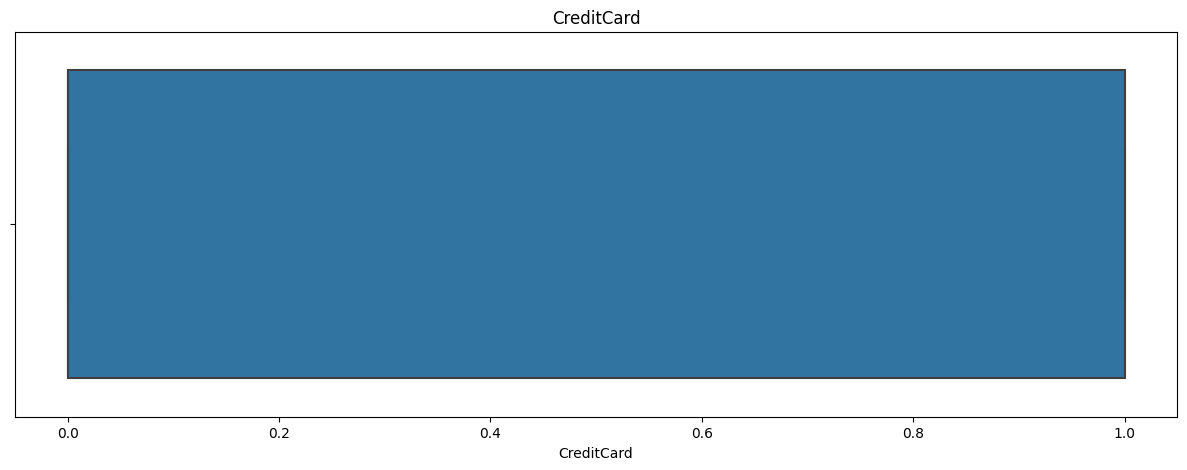

In [13]:
# Let us look at the distribution of all the columns
# We have already done this but let us use Boxplots as it will not only help us with the distributions but also the outliers

for col in df.columns:
    plt.figure(figsize=(15,5))
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(15, 5))
        sns.boxplot(data=df, x=col)
        plt.title(col)
        plt.show()
    else:
        print(f"Skipping {col} because it is not numeric.")

We do have some outliers  :(

****
# Data Preprocessing #
****

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [15]:
# Let us check for null values
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [16]:
# No null values
# Let us look at the feature with the categorical datatype

df['CCAvg']

0       1/60
1       1/50
2       1/00
3       2/70
4       1/00
        ... 
4995    1/90
4996    0/40
4997    0/30
4998    0/50
4999    0/80
Name: CCAvg, Length: 5000, dtype: object

In [17]:
df['CCAvg']=df['CCAvg'].apply(lambda x : re.sub(r'/' , '.' , x))
df['CCAvg'] = df['CCAvg'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
# Let us drop unwanted columns
# We dont require Id as well as Zip Code

col=['ZIP Code','ID']
df.drop(columns=col,axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


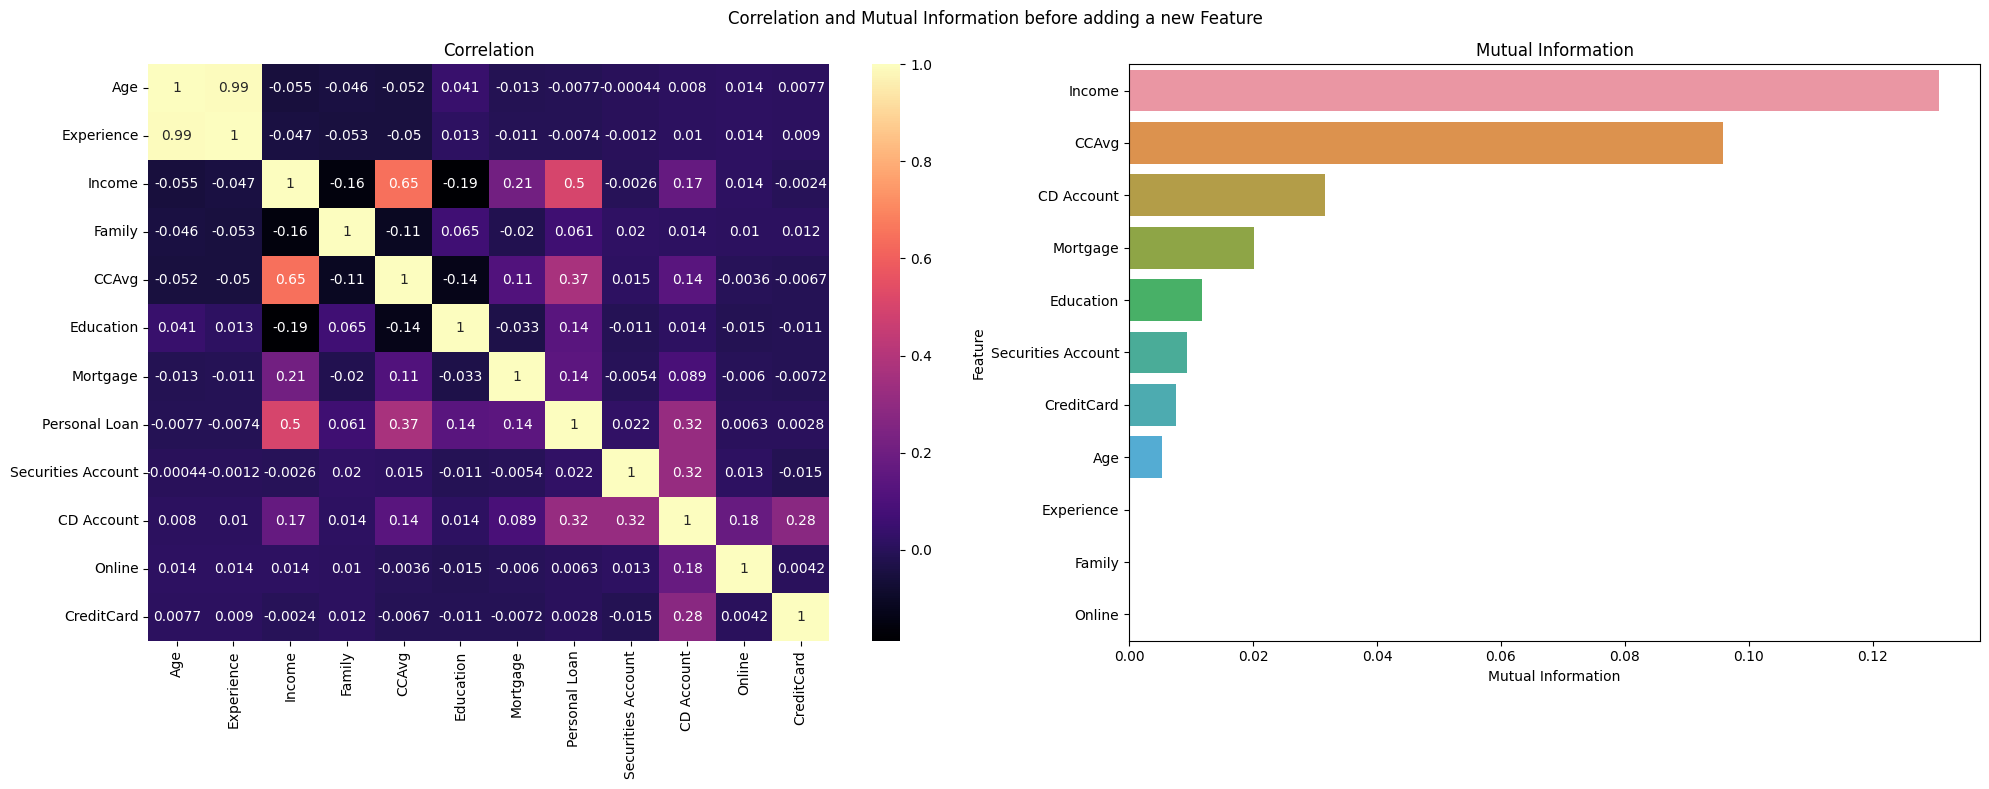

In [21]:
# Let us look at how are feature are correlated to each other and using mutual information let us look at how
# the features affect the Target Variable

# Lets calculate mutual information then move on to visualize correlation and mutual information

from sklearn.feature_selection import mutual_info_classif

tdf=df.copy()  
x=tdf.drop(columns='Personal Loan')
y=tdf['Personal Loan']

mi=mutual_info_classif(x,y)

mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(tdf.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [22]:
# importing 
from sklearn.model_selection import train_test_split
x=df.drop(columns='Personal Loan')
y=df['Personal Loan']

In [23]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
# Models #
****

In [24]:
# importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [25]:
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

## Logistic Regression ##

In [26]:
reg=LogisticRegression(max_iter=4000)
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nreg.fit(x_t,y_t)
print(nreg.best_params_)
print(nreg.best_score_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 8}
0.9541333333333334


In [27]:
nreg=nreg.best_estimator_
predt1=nreg.predict(x_t)
pred1=nreg.predict(x_te)

In [28]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

## K Nearest Neighbors ##

In [29]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)

{'n_neighbors': 28}
0.9130666666666667


In [30]:
nknn=nknn.best_estimator_
predt2=nknn.predict(x_t)
pred2=nknn.predict(x_te)

In [31]:
cr.append(classification_report(y_te,pred2))
cm_t.append(confusion_matrix(y_t,predt2))
cm.append(confusion_matrix(y_te,pred2))
acc_t.append(accuracy_score(y_t,predt2))
acc.append(accuracy_score(y_te,pred2))
p_t.append(precision_score(y_t,predt2))
p.append(precision_score(y_te,pred2))
r_t.append(recall_score(y_t,predt2))
r.append(recall_score(y_te,pred2))
f1_t.append(f1_score(y_t,predt2))
f1.append(f1_score(y_te,pred2))

## Support Vector Machines ##

In [32]:
nsvm = SVC(class_weight='balanced')
nsvm.fit(x_t, y_t)

SVC(class_weight='balanced')

In [33]:
predt7=nsvm.predict(x_t)
pred7=nsvm.predict(x_te)

In [34]:
cr.append(classification_report(y_te,pred7))
cm_t.append(confusion_matrix(y_t,predt7))
cm.append(confusion_matrix(y_te,pred7))
acc_t.append(accuracy_score(y_t,predt7))
acc.append(accuracy_score(y_te,pred7))
p_t.append(precision_score(y_t,predt7))
p.append(precision_score(y_te,pred7))
r_t.append(recall_score(y_t,predt7))
r.append(recall_score(y_te,pred7))
f1_t.append(f1_score(y_t,predt7))
f1.append(f1_score(y_te,pred7))

## Decision Trees ##

In [35]:
dt=DecisionTreeClassifier(class_weight ='balanced')
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',n_iter=5)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 6.51348210398991e-19}
0.9837333333333333


In [36]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)

{'min_samples_split': 19, 'min_samples_leaf': 18, 'criterion': 'entropy'}
0.9866666666666667


In [37]:
ndt=ndt.best_estimator_
predt3=ndt.predict(x_t)
pred3=ndt.predict(x_te)

In [38]:
cr.append(classification_report(y_te,pred3))
cm_t.append(confusion_matrix(y_t,predt3))
cm.append(confusion_matrix(y_te,pred3))
acc_t.append(accuracy_score(y_t,predt3))
acc.append(accuracy_score(y_te,pred3))
p_t.append(precision_score(y_t,predt3))
p.append(precision_score(y_te,pred3))
r_t.append(recall_score(y_t,predt3))
r.append(recall_score(y_te,pred3))
f1_t.append(f1_score(y_t,predt3))
f1.append(f1_score(y_te,pred3))

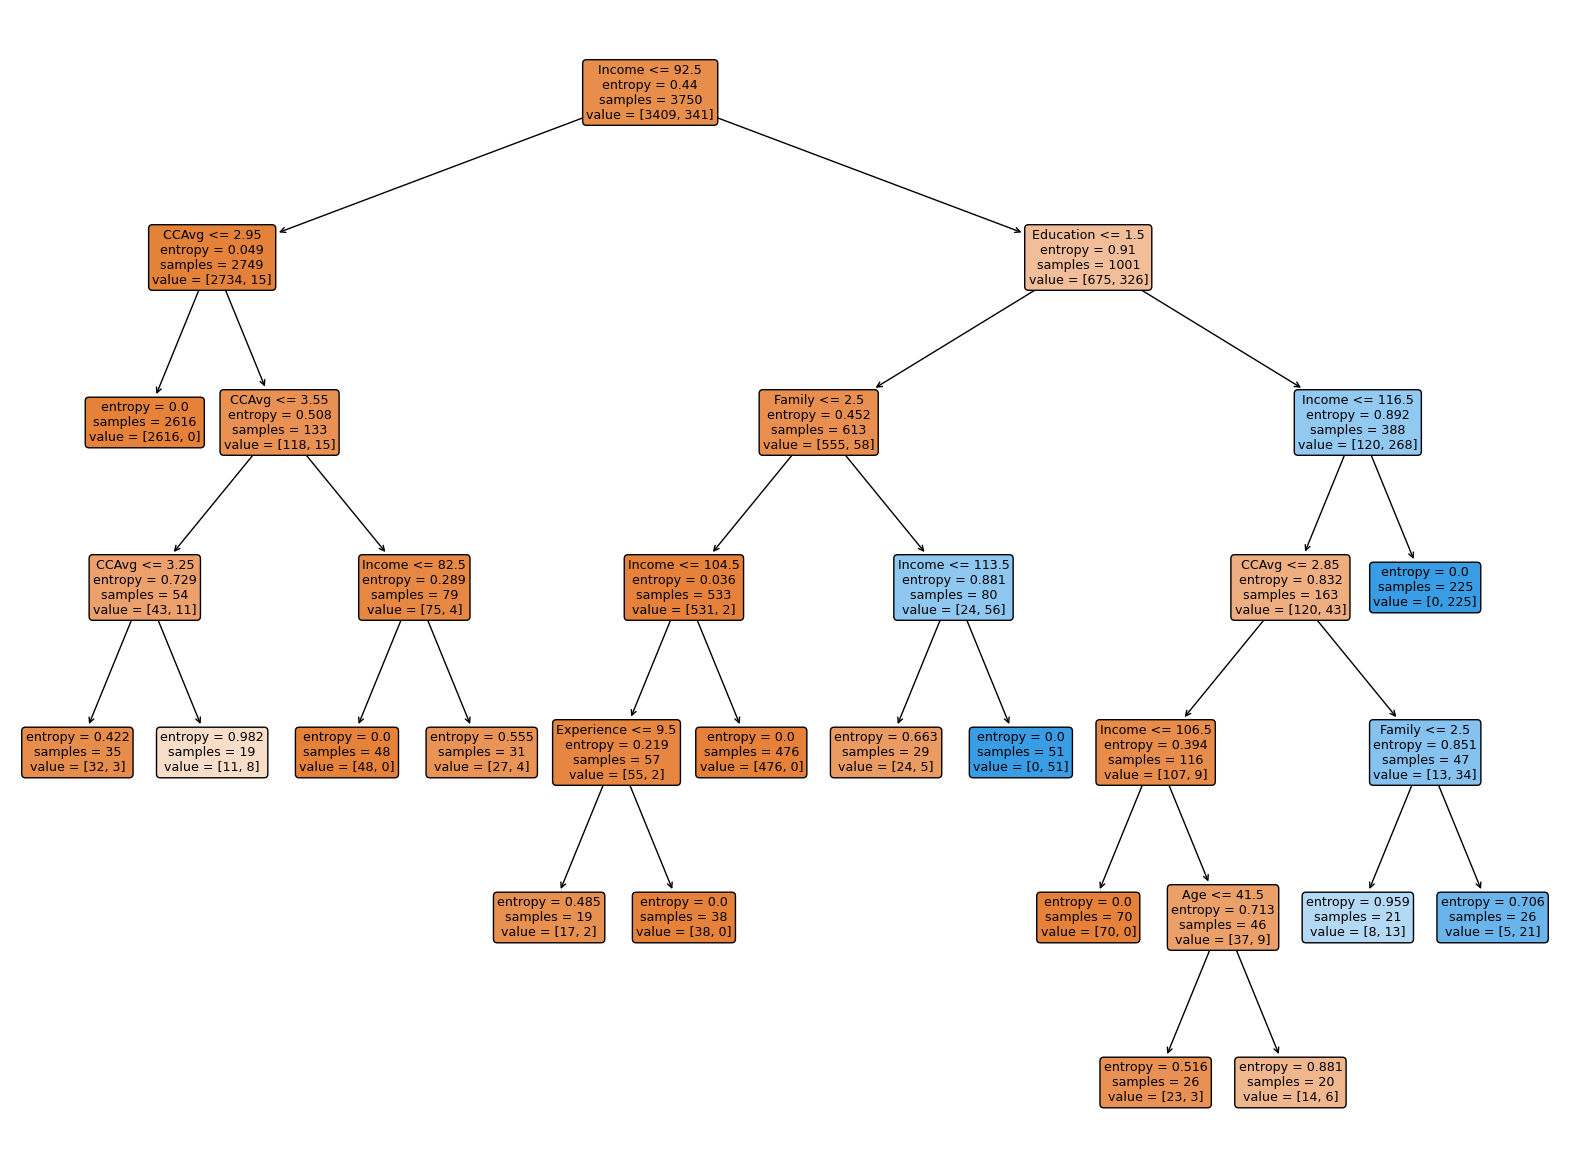

In [39]:
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,feature_names=x_t.columns,rounded=True)
plt.show()

## Random Forest ##

In [40]:
rf=RandomForestClassifier(class_weight ='balanced')
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None],
       'n_estimators':[400]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 400, 'min_samples_split': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'gini'}
0.9783999999999999


In [41]:
nrf=nrf.best_estimator_
predt4=nrf.predict(x_t)
pred4=nrf.predict(x_te)

In [42]:
cr.append(classification_report(y_te,pred4))
cm_t.append(confusion_matrix(y_t,predt4))
cm.append(confusion_matrix(y_te,pred4))
acc_t.append(accuracy_score(y_t,predt4))
acc.append(accuracy_score(y_te,pred4))
p_t.append(precision_score(y_t,predt4))
p.append(precision_score(y_te,pred4))
r_t.append(recall_score(y_t,predt4))
r.append(recall_score(y_te,pred4))
f1_t.append(f1_score(y_t,predt4))
f1.append(f1_score(y_te,pred4))

## AdaBoost ##

In [43]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [500],
    'learning_rate': np.arange(0.01, 2.01, 0.01)}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 500, 'learning_rate': 1.02}
0.9773333333333334


In [44]:
nada=nada.best_estimator_
predt5=nada.predict(x_t)
pred5=nada.predict(x_te)

In [45]:
cr.append(classification_report(y_te,pred5))
cm_t.append(confusion_matrix(y_t,predt5))
cm.append(confusion_matrix(y_te,pred5))
acc_t.append(accuracy_score(y_t,predt5))
acc.append(accuracy_score(y_te,pred5))
p_t.append(precision_score(y_t,predt5))
p.append(precision_score(y_te,pred5))
r_t.append(recall_score(y_t,predt5))
r.append(recall_score(y_te,pred5))
f1_t.append(f1_score(y_t,predt5))
f1.append(f1_score(y_te,pred5))

## Gradient Boost ##

In [46]:
gb=GradientBoostingClassifier()
params={'n_estimators': [700], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.8, 'n_estimators': 700, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_features': None, 'learning_rate': 0.05}
0.9906666666666666


In [47]:
ngb=ngb.best_estimator_
predt6=ngb.predict(x_t)
pred6=ngb.predict(x_te)

****
# Model Evaluation Metrics #
****

In [48]:
cr.append(classification_report(y_te,pred6))
cm_t.append(confusion_matrix(y_t,predt6))
cm.append(confusion_matrix(y_te,pred6))
acc_t.append(accuracy_score(y_t,predt6))
acc.append(accuracy_score(y_te,pred6))
p_t.append(precision_score(y_t,predt6))
p.append(precision_score(y_te,pred6))
r_t.append(recall_score(y_t,predt6))
r.append(recall_score(y_te,pred6))
f1_t.append(f1_score(y_t,predt6))
f1.append(f1_score(y_te,pred6))

In [49]:
models=['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Adaboost','Gradient Boost']
for model, report in zip(models, cr):
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1111
           1       0.81      0.58      0.68       139

    accuracy                           0.94      1250
   macro avg       0.88      0.78      0.82      1250
weighted avg       0.93      0.94      0.93      1250


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1111
           1       0.55      0.17      0.25       139

    accuracy                           0.89      1250
   macro avg       0.73      0.57      0.60      1250
weighted avg       0.86      0.89      0.87      1250


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1111
           1       0.38      0.90      0.53       139

    accuracy                           0.82      1250
   macro avg     

In [50]:
m_t=pd.DataFrame({'Classification Algorithms':models,'Training Accuracy':acc_t,'Training Precision':p_t,
                  'Training Recall':r_t,'Training F1 Score':f1_t})
m_t.sort_values(by=['Training Accuracy','Training Precision','Training Recall','Training F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Gradient Boost,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.988267,0.959752,0.909091,0.933735
2,Random Forest,0.982933,0.848866,0.988270,0.913279
3,Adaboost,0.979467,0.937086,0.829912,0.880249
4,Logistic Regression,0.955467,0.829545,0.642229,0.723967
5,KNN,0.920533,0.680672,0.237537,0.352174
6,SVM,0.834667,0.348205,0.938416,0.507937


In [51]:
m_te=pd.DataFrame({'Classification Algorithms':models,'Testing Accuracy':acc,'Testing Precision':p,
                  'Testing Recall':r,'Testing F1 Score':f1})
m_te.sort_values(by=['Testing Accuracy','Testing Precision','Testing Recall','Testing F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Gradient Boost,0.9824,0.960630,0.877698,0.917293
1,Decision Tree,0.9760,0.943089,0.834532,0.885496
2,Random Forest,0.9680,0.807453,0.935252,0.866667
3,Adaboost,0.9648,0.905983,0.762590,0.828125
4,Logistic Regression,0.9384,0.810000,0.582734,0.677824
5,KNN,0.8920,0.547619,0.165468,0.254144
6,SVM,0.8232,0.376506,0.899281,0.530786


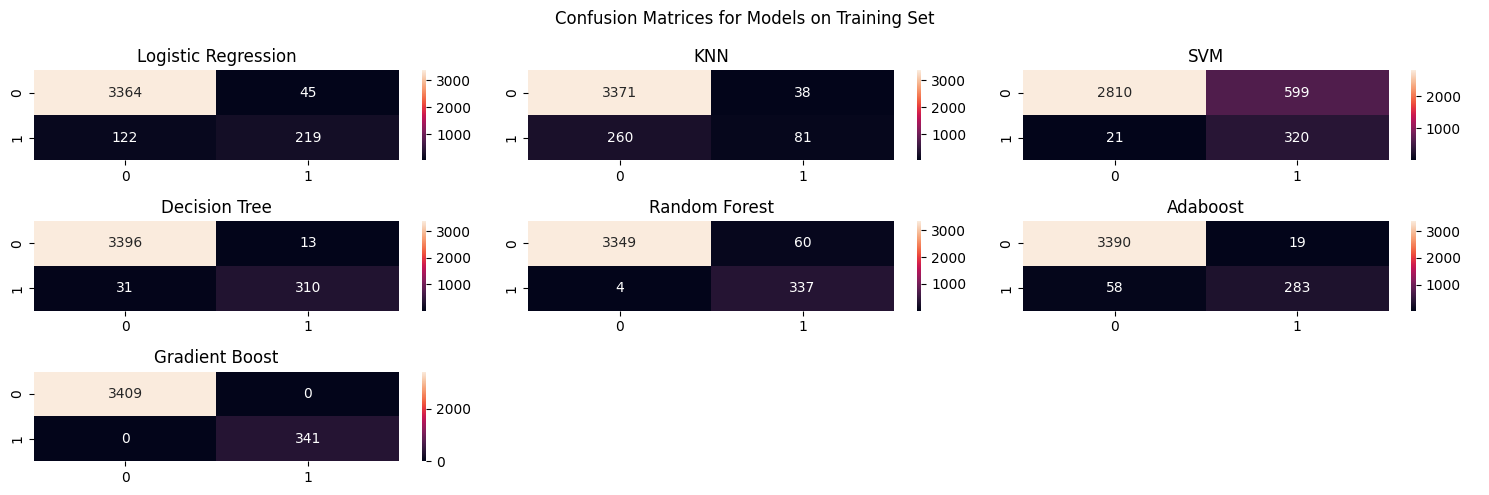

In [53]:
fig,ax=plt.subplots(3,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
ax[2][2].axis('off')
ax[2][1].axis('off')
plt.tight_layout()
plt.show()

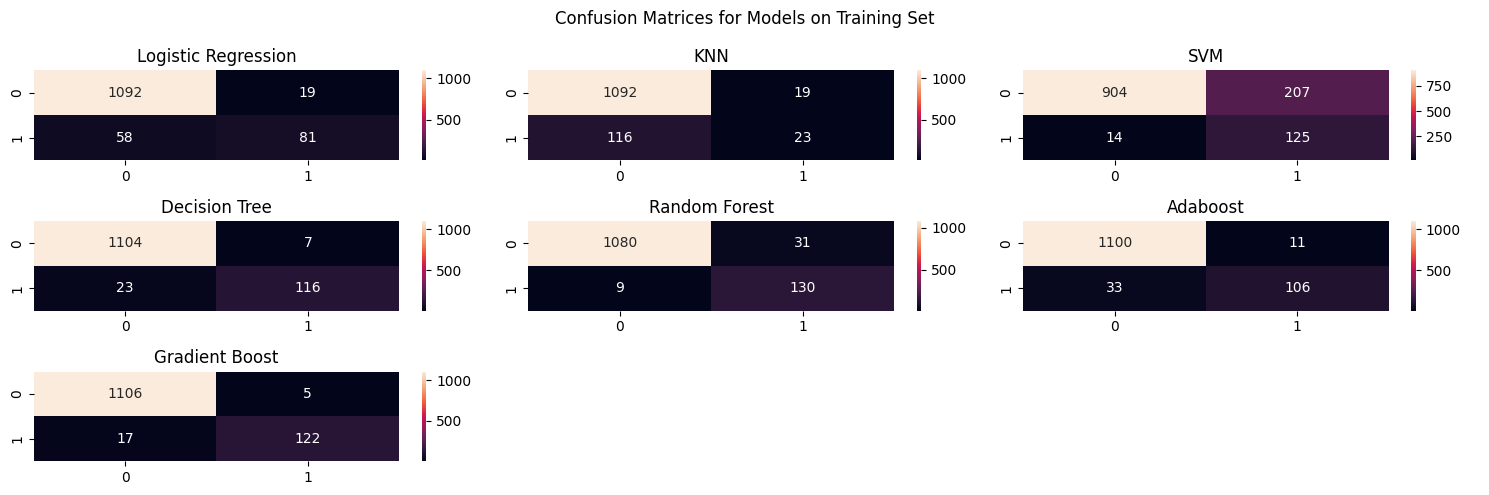

In [54]:
fig,ax=plt.subplots(3,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
ax[2][2].axis('off')
ax[2][1].axis('off')
plt.tight_layout()
plt.show()

****
# Conclusion #
****

1. Gradient Boosting: Achieves the highest performance with excellent accuracy, precision, recall, and F1-score in both training (100%) and testing (98.24%) phases, indicating strong generalization.

2. Decision Tree: Performs well with high accuracy (97.6%) and good precision-recall balance, but slightly lower generalization compared to Gradient Boost.

3. Random Forest: Shows a good testing accuracy (96.8%) with high recall, making it suitable for tasks prioritizing fewer false negatives.

4. Adaboost: Delivers balanced performance (96.48%) with good precision and recall, but slightly lower than Gradient Boost and Decision Tree.

5. Logistic Regression: Achieves decent performance but struggles with recall, particularly in testing (67.78% F1-score), indicating possible underfitting.

6. KNN: Underperforms with the lowest testing accuracy (89.2%), reflecting poor generalization and especially low recall.

7. SVM: Shows high recall but very low precision, leading to poor overall F1-score (53%) in testing, indicating a mismatch between predicted and actual labels.

**** 
# Feedback and Suggestions #
****

**Provide feedback and suggestions to improve this notebook**

**Kindly Upvote if you found this notebook helpful or if you like it**